# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [2]:
# read the iris data into a pandas DataFrame, including column names
df=pd.read_csv('iris.csv')

## Task 2

In [3]:
# gather basic information

In [4]:
df.head()
# first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()
# last 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.describe()
# statistic values

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()
# how much column and rows(entries) and their DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()
#Check if data has missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.sample(5)
#random 5 samples

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,setosa
131,7.9,3.8,6.4,2.0,virginica
96,5.7,2.9,4.2,1.3,versicolor
87,6.3,2.3,4.4,1.3,versicolor
3,4.6,3.1,1.5,0.2,setosa


In [10]:
df.corr()
#correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [11]:
#rows & columns
df.shape

(150, 5)

In [12]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [50]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Task 3

In [125]:
# use groupby to look for differences between the species
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_num,sepal_area,petal_area
species,,,,,,,
setosa,5.006,3.428,1.462,0.246,0.0,17.2578,0.3656
versicolor,5.936,2.770,4.260,1.326,1.0,16.5262,5.7204
virginica,6.588,2.974,5.552,2.026,2.0,19.6846,11.2962


In [57]:
df.groupby('species').sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [58]:
df.groupby("species").describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [45]:
# use sorting to look for differences between the species
df.sort_values(by=['species'], inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
141,6.9,3.1,5.1,2.3,virginica


In [48]:
df.sort_values(by=['species','sepal_length'], inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [55]:
df.sort_values("sepal_length").values

array([[4.3, 3.0, 1.1, 0.1, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [4.4, 3.0, 1.3, 0.2, 'setosa'],
       [4.5, 2.3, 1.3, 0.3, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [4.6, 3.2, 1.4, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.1, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.3, 'setosa'],
       [4.9, 2.4, 3.3, 1.0, 'versicolor'],
       [4.9, 3.1, 1.5, 0.2, 'setosa'],
       [4.9, 2.5, 4.5, 1.7, 'virginica'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.9, 3.6, 1.4, 0.1, 'setosa'],
       [5.0, 3.0, 1.6, 0.2, 'setosa'],
       [5.0, 3.2, 1.2, 0.2, 'setosa'],
       [5.0, 3.4, 1.6, 0.4, 'setosa'],
       [5.0, 3.5, 

In [ ]:
# I'm sorry, I don't know if this was asked with use sorting

In [43]:
import seaborn as sns
df=sns.load_dataset('iris')

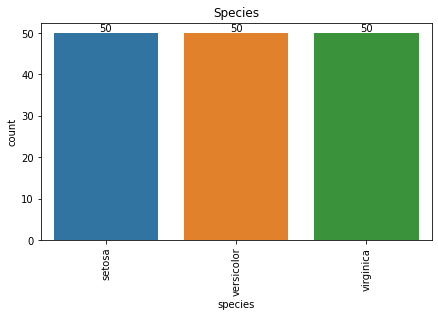

In [15]:
# use plotting to look for differences between the species
plt.figure(figsize=(7,4))
plt.title("Species")
ax=sns.countplot(x=df["species"]);
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

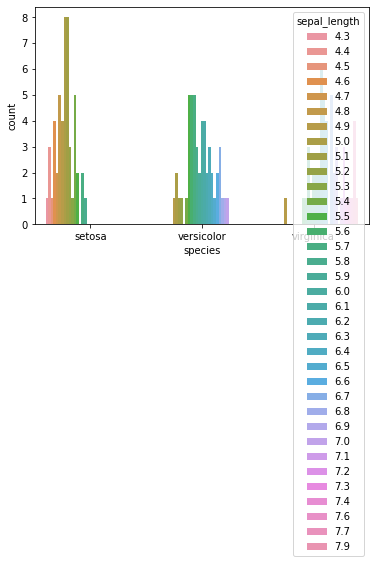

In [16]:
sns.countplot(x=df["species"],hue=df.sepal_length);

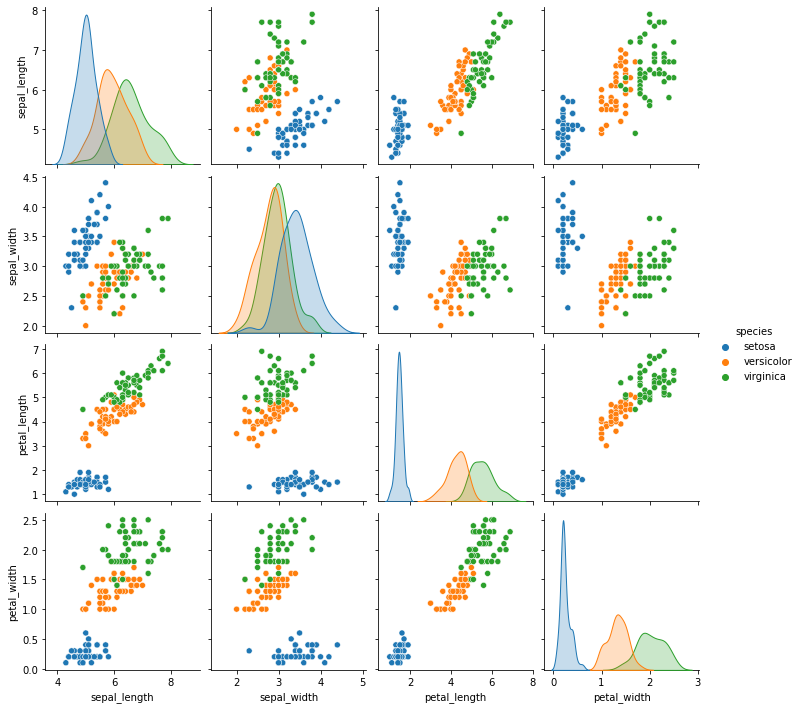

In [24]:
sns.pairplot(df,hue="species");

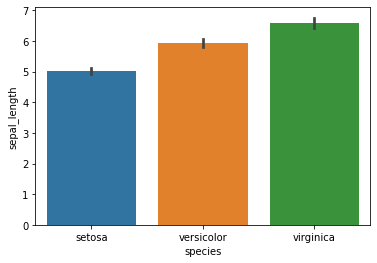

In [34]:
sns.barplot(x=df['species'],y=df['sepal_length']);

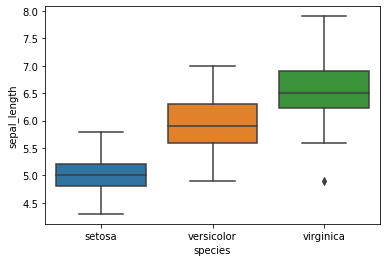

In [35]:
sns.boxplot(x=df['species'],y=df['sepal_length']);

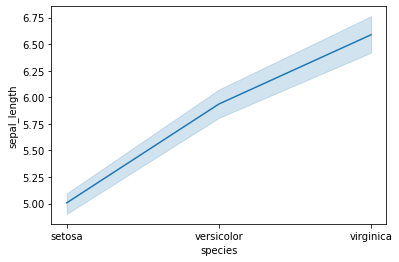

In [40]:
sns.lineplot(x=df['species'],y=df['sepal_length']);

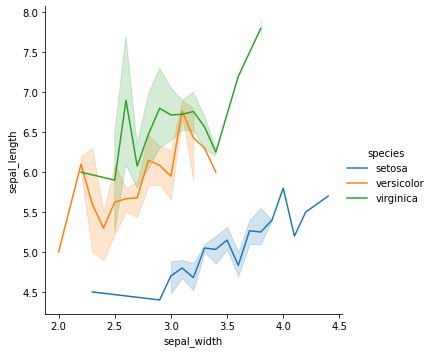

In [39]:
sns.relplot(x='sepal_width', y='sepal_length',kind='line', hue='species',data=df);

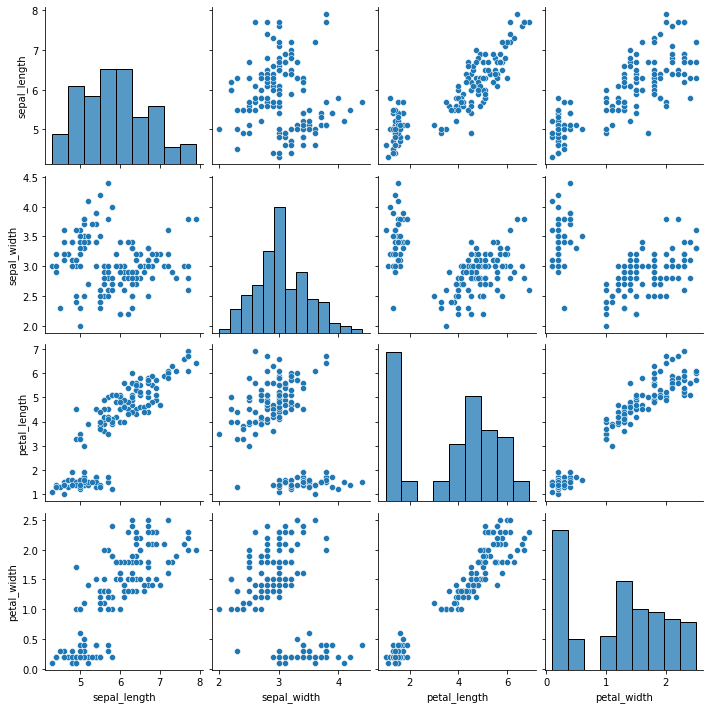

In [42]:
sns.pairplot(df);

In [33]:
# map species to a numeric value so that plots can be colored by category

In [68]:
d={'setosa':0, 'versicolor':1, 'virginica':2}

In [69]:
df['species_num']=df.species.map(d)
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
13,4.3,3.0,1.1,0.1,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
42,4.4,3.2,1.3,0.2,setosa,0
38,4.4,3.0,1.3,0.2,setosa,0
41,4.5,2.3,1.3,0.3,setosa,0
...,...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,virginica,2
118,7.7,2.6,6.9,2.3,virginica,2
122,7.7,2.8,6.7,2.0,virginica,2
135,7.7,3.0,6.1,2.3,virginica,2


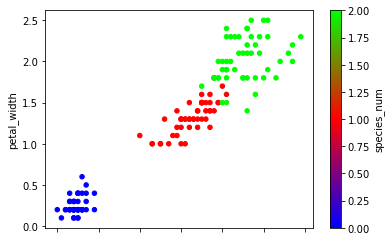

In [95]:
df.plot(kind="scatter", x="petal_length", y="petal_width", c="species_num", colormap="brg");

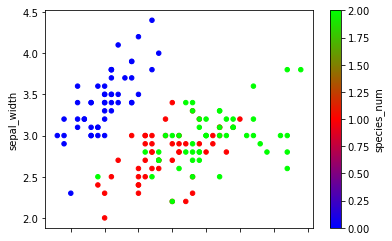

In [81]:
df.plot(kind="scatter", x="sepal_length", y="sepal_width", c="species_num", colormap="brg");

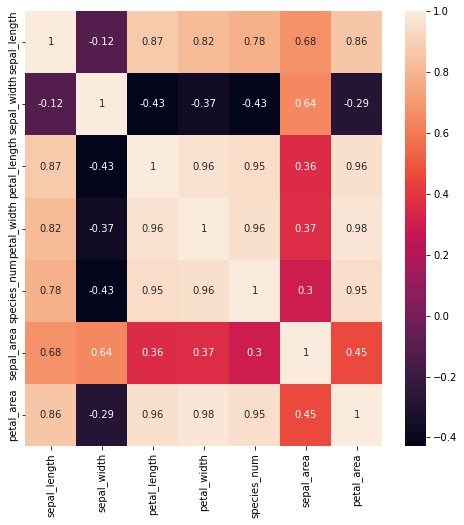

In [127]:
plt.figure(figsize=(8,8));
sns.heatmap(df.corr(), annot=True);

## Task 4
### Come up with a set of rules that could be used to predict species based upon measurements.

### <font color=blue> Feature Engineering

In [99]:
## sepal area - length*width
df['sepal_area']=df.sepal_length*df.sepal_width

In [101]:
## petal area - length*width
df['petal_area']=df.petal_length*df.petal_width

In [102]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,sepal_area,petal_area
13,4.3,3.0,1.1,0.1,setosa,0,12.90,0.11
8,4.4,2.9,1.4,0.2,setosa,0,12.76,0.28
42,4.4,3.2,1.3,0.2,setosa,0,14.08,0.26
38,4.4,3.0,1.3,0.2,setosa,0,13.20,0.26
41,4.5,2.3,1.3,0.3,setosa,0,10.35,0.39
...,...,...,...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,virginica,2,29.26,14.74
118,7.7,2.6,6.9,2.3,virginica,2,20.02,15.87
122,7.7,2.8,6.7,2.0,virginica,2,21.56,13.40
135,7.7,3.0,6.1,2.3,virginica,2,23.10,14.03


In [104]:
df.groupby("species").petal_area.mean()

species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64

In [105]:
df.groupby("species").sepal_area.mean()

species
setosa        17.2578
versicolor    16.5262
virginica     19.6846
Name: sepal_area, dtype: float64

In [108]:
df.groupby("species").sepal_area.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,17.2578,2.933775,10.35,15.0400,17.170,19.1550,25.08
versicolor,50.0,16.5262,2.866882,10.00,14.3475,16.385,18.4950,22.40
virginica,50.0,19.6846,3.458783,12.25,17.4300,20.060,21.4125,30.02


## Bonus

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [122]:
# define function that accepts a row of data and returns a predicted species
def predict_species(x,y):
    g=GaussianNB()
    b=BernoulliNB()
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [g,b]
    algo_names = ['Gaussian','Bernoulli']
    
    accscore = []
    confmatrix = []
    #classifraport = []
    
    result = pd.DataFrame(columns = ['Accuracy_score','Confusion_matrix'],index = algo_names)
    
    for algo in algos:
        algo.fit(x_train,y_train)
        
        accscore.append(accuracy_score(algo.predict(x_test),y_test))
        confmatrix.append(confusion_matrix(algo.predict(x_test),y_test))
        
    result.Accuracy_score = accsore
    result.Confusion_matrix = confmatrix
    
    return result.sort_values('Accuracy:score', ascending=False)

In [123]:
x=df
x=pd.get_dummies(x,drop_first=True)
y = df[['species']]
predict_species(x,y)

NameError: name 'train_test_split' is not defined

In [ ]:
## from Data Science Wapp group

In [1]:
def classify_iris(row):
    petal_area = (row[2] * row[3]) #define petal area, petal_length * petal_width
    
    if petal_area < 2:
        prediction = "setosa"
    elif petal_area < 7.5: 
        prediction = "versicolor"
    else: 
        prediction = "virginica"
        
    factorize = {'setosa':0, 'versicolor':1, 'virginica':2}    #need to map the strings back to their factors
    return factorize[prediction]

In [3]:
predictions = [classify_iris(row) for index, row in df.iterrows()] # store predictions for all rows


NameError: name 'df' is not defined

In [4]:
predictions

NameError: name 'predictions' is not defined

In [5]:
np.mean(df.species_num == predictions) # calculate the percentage of correct predictions

NameError: name 'np' is not defined

In [6]:
sum(df.species_num == predictions) / len(predictions) # calculate the percentage of correct predictions

NameError: name 'df' is not defined